# Translating from RTNI2 to TensorNetwork.

Let's use the integral $\mathbb E[MAM^*AMBM^*]$ for $M$ being the $2 \times 2$ random unitary matrix. For this tutorial [TensorNetwork](https://github.com/google/TensorNetwork) must be installed; during the installation, <code>graphviz</code> should be insalled for visualization. Note that functions starting with <code>tn.</code> are offered by TensorNetwork. 

In [1]:
import rtni2 as rtni
from sympy import symbols
import numpy as np

# importing functions from TensorNetwork.
import tensornetwork as tn

In [2]:
# Set the dimension.
d = symbols('d')

In [3]:
# Define matrices.
m1 = rtni.matrix(name='m', dims=[[d],[d]], nickname='munich')
m2 = m1.clone(nickname='montreal')
ma1 = m1.clone(nickname='milan'); ma1.adjoint()
# No nickname. 
ma2 = m1.clone(); ma2.adjoint()

a1 = rtni.matrix(name='a', dims=[[d],[d]], nickname='atlanta')
a2 = a1.clone(nickname='amsterdam')
# No nickname. 
b = rtni.matrix(name='b', dims=[[d],[d]])

In [4]:
# Connect them.
m1.inn(0) * a1.out(0)
a1.inn(0) * ma1.out(0)
ma1.inn(0) * a2.out(0)
a2.inn(0) * m2.out(0)
m2.inn(0) * b.out(0)
b.inn(0) * ma2.out(0)

Connected.
Connected.
Connected.
Connected.
Connected.
Connected.


In [5]:
# Set the system.
tensor_networks = rtni.tensornetworks([a1, a2, b, m1, m2, ma1, ma2])
# tensor_networks.show(counting=True)

tensor a clone 0 has been added.
tensor a clone 1 has been added.
tensor b clone 0 has been added.
tensor m clone 0 has been added.
tensor m clone 1 has been added.
tensor m clone 2 has been added.
tensor m clone 3 has been added.


In [6]:
# integrate over the unitary matrix. 
tensor_networks.integrate('m', 'unitary')
# tensor_networks.show()

Integrated. We now have 4 tensor networks.



## Pick one of the four tensor networks. 
They are numbered as 0, 1, 2, 3 with Python. 

In [7]:
# make a copy so that one can start from here again. 
# We pick the second one.
import copy
tensornetwork = copy.deepcopy(tensor_networks[1])

## Calculate the weight, separately.

In [8]:
dim = 2
tensornetwork.weight(dim_symbols_dict={d:dim})

-1/6

## Translate from RTNI2 to TensorNetwork, and get the relevant dictionary data.

In [9]:
# Translating from RTNI2 to TensorNetwork.
tensornetwork_tn = tensornetwork.to_tn()

# Getting the dictionary of nodes of TensorNetwork. 
nodes_dict = tensornetwork_tn.get_tns()

# Data is classified with respect to the names. 
# At this satge, each node has the edge data while the array is np.empty().
for name, data_all in nodes_dict.items():
    print('name:', name)
    display(data_all)
    print()

name: a


{0: Node
 (
 name : 'a_0',
 tensor : 
 array([[5.e-324]]),
 edges : 
 [
 Edge('a_0'[0] -> 'b_0'[1] )
 , 
 Edge('a_0'[1] -> 'b_0'[0] )
 ] 
 ),
 1: Node
 (
 name : 'a_1',
 tensor : 
 array([[0.]]),
 edges : 
 [
 Edge('a_1'[0] -> 'dg_m_0_0'[0] )
 , 
 Edge('a_1'[1] -> 'dg_m_3_0'[0] )
 ] 
 )}


name: b


{0: Node
 (
 name : 'b_0',
 tensor : 
 array([[4.66729e-310]]),
 edges : 
 [
 Edge('a_0'[1] -> 'b_0'[0] )
 , 
 Edge('a_0'[0] -> 'b_0'[1] )
 ] 
 )}


name: dg_m


{0: {0: Node
  (
  name : 'dg_m_0_0',
  tensor : 
  array([4.66728993e-310]),
  edges : 
  [
  Edge('a_1'[0] -> 'dg_m_0_0'[0] )
  ] 
  )},
 3: {0: Node
  (
  name : 'dg_m_3_0',
  tensor : 
  array([4.66728994e-310]),
  edges : 
  [
  Edge('a_1'[1] -> 'dg_m_3_0'[0] )
  ] 
  )}}

## Assign concrete tensors to the nodes by TensorNetwork. 

In [10]:
# The assignment can be done via such a dictionary as below. 
tensornetwork_tn.subs({'a': np.array([[1,2],[3,4]]), 'b': np.array([[11,12],[13,14]])})

In [11]:
# Let's see what are different now. 
nodes_dict = tensornetwork_tn.get_tns()

for name, data_all in nodes_dict.items():
    print(name)
    display(data_all)
    print()

a


{0: Node
 (
 name : 'a_0',
 tensor : 
 array([[1, 2],
        [3, 4]]),
 edges : 
 [
 Edge('a_0'[0] -> 'b_0'[1] )
 , 
 Edge('a_0'[1] -> 'b_0'[0] )
 ] 
 ),
 1: Node
 (
 name : 'a_1',
 tensor : 
 array([[1, 2],
        [3, 4]]),
 edges : 
 [
 Edge('a_1'[0] -> 'dg_m_0_0'[0] )
 , 
 Edge('a_1'[1] -> 'dg_m_3_0'[0] )
 ] 
 )}


b


{0: Node
 (
 name : 'b_0',
 tensor : 
 array([[11, 12],
        [13, 14]]),
 edges : 
 [
 Edge('a_0'[1] -> 'b_0'[0] )
 , 
 Edge('a_0'[0] -> 'b_0'[1] )
 ] 
 )}


dg_m


{0: {0: Node
  (
  name : 'dg_m_0_0',
  tensor : 
  array([4.66728993e-310]),
  edges : 
  [
  Edge('a_1'[0] -> 'dg_m_0_0'[0] )
  ] 
  )},
 3: {0: Node
  (
  name : 'dg_m_3_0',
  tensor : 
  array([4.66728994e-310]),
  edges : 
  [
  Edge('a_1'[1] -> 'dg_m_3_0'[0] )
  ] 
  )}}

## If graphviz is successfully installed, one can see the tensor network graphically.

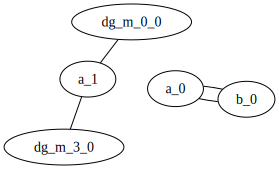

In [12]:
nodes_list =tensornetwork_tn.get_tns_list()
display(tn.to_graphviz(nodes_list))

## Re-tranlate it without explicit dangling edges. 

In [13]:
tensornetwork_tn = tensornetwork.to_tn(include_danglings=False)
tensornetwork_tn.subs({'a': np.array([[1,2],[3,4]]), 'b': np.array([[11,12],[13,14]])})
nodes_dict = tensornetwork_tn.get_tns()
for name, data_all in nodes_dict.items():
    print(name)
    display(data_all)
    print()

a


{0: Node
 (
 name : 'a_0',
 tensor : 
 array([[1, 2],
        [3, 4]]),
 edges : 
 [
 Edge('a_0'[0] -> 'b_0'[1] )
 , 
 Edge('a_0'[1] -> 'b_0'[0] )
 ] 
 ),
 1: Node
 (
 name : 'a_1',
 tensor : 
 array([[1, 2],
        [3, 4]]),
 edges : 
 [
 Edge(Dangling Edge)[0] 
 , 
 Edge(Dangling Edge)[1] 
 ] 
 )}


b


{0: Node
 (
 name : 'b_0',
 tensor : 
 array([[11, 12],
        [13, 14]]),
 edges : 
 [
 Edge('a_0'[1] -> 'b_0'[0] )
 , 
 Edge('a_0'[0] -> 'b_0'[1] )
 ] 
 )}

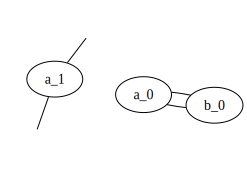

In [14]:
# Again, if graphviz is successfully installed:
nodes_list =tensornetwork_tn.get_tns_list()
display(tn.to_graphviz(nodes_list))

## Let's contract the connected component with a_0, using TensorNetwork.

In [15]:
# We make a copy in this tutorial because the contractoin operation alters tensor networks.
nodes_dict_copy = copy.deepcopy(nodes_dict)

# The following is a node by TensorNetwork:
target_node = nodes_dict_copy['a'][0]
target_component = tn.reachable(target_node)
result = tn.contractors.optimal(target_component, ignore_edge_order=True)

display(result)

Node
(
name : '__unnamed_node__',
tensor : 
array(129),
edges : 
[] 
)

## Let's contract the connected component with b_0 similarly. The result is the same.

In [16]:
nodes_dict_copy = copy.deepcopy(nodes_dict)

# The following is a node by TensorNetwork:
target_node = nodes_dict_copy['b'][0]
target_component = tn.reachable(target_node)
result = tn.contractors.optimal(target_component, ignore_edge_order=True)

display(result)

Node
(
name : '__unnamed_node__',
tensor : 
array(129),
edges : 
[] 
)

## Let's contract the connected component with a_1 for completion. 

In [17]:
nodes_dict_copy = copy.deepcopy(nodes_dict)

# The following is a node by TensorNetwork:
target_node = nodes_dict_copy['a'][1]
target_component = tn.reachable(target_node)
result = tn.contractors.optimal(target_component, ignore_edge_order=True)

display(result)

Node
(
name : 'a_1',
tensor : 
array([[1, 2],
       [3, 4]]),
edges : 
[
Edge(Dangling Edge)[0] 
, 
Edge(Dangling Edge)[1] 
] 
)

## Next, let's see how to use nicknames in the translation. 

In [18]:
# Translating RTNI2 to TensorNetwork.
tensornetwork_tn = tensornetwork.to_tn()

# After the translation, replace the names of nodes of TensorNetwork by the nicknames. 
tensornetwork_tn.to_nickname()

# Getting the dictionary of nodes of TensorNetwork. 
nodes_dict_nickname = tensornetwork_tn.get_tns_nickname()

# Data is classified with respect to the names. 
# At this satge, they carry only the connection data.
for nickname, data_all in nodes_dict_nickname.items():
    print('nickname: ', nickname)
    display(data_all)
    print()

nickname:  atlanta


Node
(
name : 'atlanta',
tensor : 
array([[5.e-324]]),
edges : 
[
Edge('atlanta'[0] -> 'b_0'[1] )
, 
Edge('atlanta'[1] -> 'b_0'[0] )
] 
)


nickname:  amsterdam


Node
(
name : 'amsterdam',
tensor : 
array([[6.37e-322]]),
edges : 
[
Edge('amsterdam'[0] -> 'dg_munich_0'[0] )
, 
Edge('amsterdam'[1] -> 'dg_m_3_0'[0] )
] 
)


nickname:  b_0


Node
(
name : 'b_0',
tensor : 
array([[1.37929726e-312]]),
edges : 
[
Edge('atlanta'[1] -> 'b_0'[0] )
, 
Edge('atlanta'[0] -> 'b_0'[1] )
] 
)


nickname:  dg_munich


{0: Node
 (
 name : 'dg_munich_0',
 tensor : 
 array([1.40051722e-312]),
 edges : 
 [
 Edge('amsterdam'[0] -> 'dg_munich_0'[0] )
 ] 
 )}


nickname:  dg_m_3


{0: Node
 (
 name : 'dg_m_3_0',
 tensor : 
 array([6.37e-322]),
 edges : 
 [
 Edge('amsterdam'[1] -> 'dg_m_3_0'[0] )
 ] 
 )}

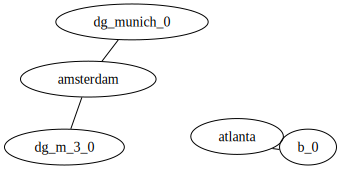

In [19]:
# Again we check it graphically. 
#Note that the matrices which were not given a nickname uses the "official name". 
nodes_list =tensornetwork_tn.get_tns_list()
display(tn.to_graphviz(nodes_list))

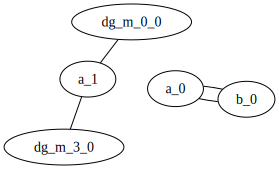

In [20]:
# One can use the "official names" again.
tensornetwork_tn.from_nickname()
nodes_list =tensornetwork_tn.get_tns_list()
display(tn.to_graphviz(nodes_list))

In [21]:
# Well, we start using the nicknames again. 
tensornetwork_tn.to_nickname()

In [22]:
# Without explicit dangling edges.
tensornetwork_tn = tensornetwork.to_tn(include_danglings=False)
tensornetwork_tn.subs({'a': np.array([[1,2],[3,4]]), 'b': np.array([[11,12],[13,14]])})

tensornetwork_tn.to_nickname()

# Getting the dictionary of nodes of TensorNetwork. 
nodes_dict_nickname = tensornetwork_tn.get_tns_nickname()

# Data is classified with respect to the names. 
# At this satge, they carry only the connection data.
for nickname, data_all in nodes_dict_nickname.items():
    print('nickname: ', nickname)
    display(data_all)
    print()


nickname:  atlanta


Node
(
name : 'atlanta',
tensor : 
array([[1, 2],
       [3, 4]]),
edges : 
[
Edge('atlanta'[0] -> 'b_0'[1] )
, 
Edge('atlanta'[1] -> 'b_0'[0] )
] 
)


nickname:  amsterdam


Node
(
name : 'amsterdam',
tensor : 
array([[1, 2],
       [3, 4]]),
edges : 
[
Edge(Dangling Edge)[0] 
, 
Edge(Dangling Edge)[1] 
] 
)


nickname:  b_0


Node
(
name : 'b_0',
tensor : 
array([[11, 12],
       [13, 14]]),
edges : 
[
Edge('atlanta'[1] -> 'b_0'[0] )
, 
Edge('atlanta'[0] -> 'b_0'[1] )
] 
)

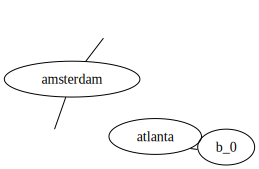

In [23]:
# Again, if graphviz is installed:
nodes_list =tensornetwork_tn.get_tns_list()
display(tn.to_graphviz(nodes_list))

In [24]:
# We make a copy in this tutorial because the contractoin operation alters tensor networks.
nodes_dict_nickname_copy = copy.deepcopy(nodes_dict_nickname)
target_node = nodes_dict_nickname_copy['atlanta']
target_component = tn.reachable(target_node)
result = tn.contractors.optimal(target_component, ignore_edge_order=True)

display(result)

Node
(
name : '__unnamed_node__',
tensor : 
array(129),
edges : 
[] 
)

In [25]:
nodes_dict_nickname_copy = copy.deepcopy(nodes_dict_nickname)
target_node = nodes_dict_nickname_copy['b_0']
target_component = tn.reachable(target_node)
result = tn.contractors.optimal(target_component, ignore_edge_order=True)

display(result)

Node
(
name : '__unnamed_node__',
tensor : 
array(129),
edges : 
[] 
)

In [26]:
nodes_dict_nickname_copy = copy.deepcopy(nodes_dict_nickname)
target_node = nodes_dict_nickname_copy['amsterdam']
target_component = tn.reachable(target_node)
result = tn.contractors.optimal(target_component, ignore_edge_order=True)

display(result)

Node
(
name : 'amsterdam',
tensor : 
array([[1, 2],
       [3, 4]]),
edges : 
[
Edge(Dangling Edge)[0] 
, 
Edge(Dangling Edge)[1] 
] 
)